Q-2. Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into<br>
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using<br>
any 4 different classification algorithms. Now you have to build a model which<br>
can classify people into different classes.<br>
Dataset This is the Dataset You can use this dataset for this question.<br>

Link : https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [10]:
df['NObeyesdad'].replace(['Obesity_Type_I','Obesity_Type_III','Obesity_Type_II'],'Obesity',inplace = True)
df['NObeyesdad'].replace(['Overweight_Level_I','Overweight_Level_II'],'Overweight',inplace = True)
df['NObeyesdad'].replace(['Insufficient_Weight',],'Under_Weight',inplace = True)


In [11]:
df['NObeyesdad'].value_counts()

Obesity          972
Overweight       580
Normal_Weight    287
Under_Weight     272
Name: NObeyesdad, dtype: int64

In [24]:
cat_column = []
num_column = []
for i in df.columns[:-1]:
    if df[i].dtype == 'O':
        cat_column.append(i)
    else:
        num_column.append(i)


In [25]:
cat_column

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [26]:
num_column

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [29]:
X = df.drop('NObeyesdad',axis = 1)
y = df['NObeyesdad']

In [31]:
X = pd.get_dummies(X,columns = cat_column)

In [32]:
#encoding the y

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

In [46]:
X_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=34)

In [47]:
print('shape of X train is :', X_train.shape)
print('shape of X test is :', x_test.shape)

shape of X train is : (1688, 31)
shape of X test is : (423, 31)


In [48]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(x_test)

In [49]:
y_train = le.fit_transform(y_train)

In [51]:
y_test = le.transform(y_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth=7)
dc

DecisionTreeClassifier(max_depth=7)

In [78]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [79]:
y_pred = dc.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [81]:
accuracy_score(y_test,y_pred)

0.9290780141843972

In [82]:
dc.score(X_train,y_train)

0.9840047393364929

In [84]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

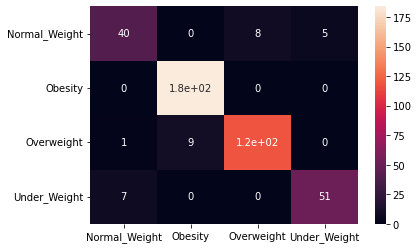

In [95]:
sns.heatmap(cm,annot=True,xticklabels=le.classes_,yticklabels=le.classes_)

In [96]:
print("Train Accuracy was: ",dc.score(X_train,y_train)*100)
print('Test Accuracy was: ',accuracy_score(y_test,y_pred)*100)

Train Accuracy was:  98.4004739336493
Test Accuracy was:  92.90780141843972
